In [60]:
import numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Фотографии чертежа

In [61]:
drawing_photo_1 = cv2.imread(r'..\img\photos\drawing_photo_1.jpg')
drawing_photo_2 = cv2.imread(r'..\img\photos\drawing_photo_2.jpg')

if (type(drawing_photo_1) != numpy.ndarray) or (type(drawing_photo_2) != numpy.ndarray):
    print('Не корректный путь к файлу')

In [62]:
# отображение чертежа
def visual(img, name='image'):
    plt.subplot(1, 1, 1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off') 
    plt.title(name) 

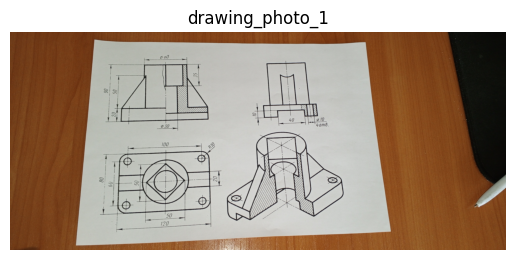

In [63]:
visual(drawing_photo_1, 'drawing_photo_1')

Text(0.5, 1.0, 'drawing_photo_2')

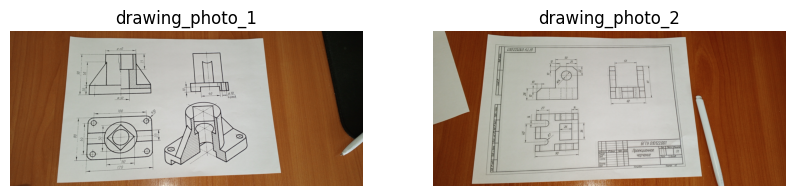

In [64]:
# Отображение входных фотографий
fig = plt.figure(figsize=(10, 7))


plt.subplot(2, 2, 1) 
plt.imshow(cv2.cvtColor(drawing_photo_1, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title("drawing_photo_1") 


plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(drawing_photo_2, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.title("drawing_photo_2") 

# Выбор изображения

In [ ]:
# Выбор изображения для обработки
drawing_photo = drawing_photo_2

# Вырезание области чертежа

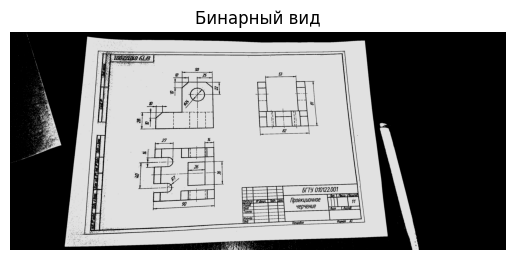

In [66]:
gray_drawing_photo = cv2.cvtColor(drawing_photo, cv2.COLOR_BGR2GRAY)

ret, contrast_drawing_photo = cv2.threshold(gray_drawing_photo, 170, 225, cv2.THRESH_BINARY)

visual(contrast_drawing_photo, 'Бинарный вид')


Количество контуров: 9206


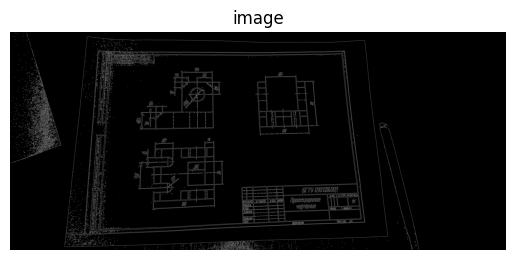

In [67]:
edged = cv2.Canny(contrast_drawing_photo, 20, 225) 
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
print("Количество контуров: " + str(len(contours))) 
visual(drawing_photo)
visual(edged)

In [68]:
# Получение глваного контура
len_edged = []
for i in edged:
    len_edged.append(len(i))
    
id_main_edged = len_edged.index(max(len_edged))
id_main_edged
head_edged = edged[id_main_edged]

In [69]:
# Получение глваного контура
print(len(contours))
len_contours = []
for i in contours:
    len_contours.append(len(i))
    
id_main_contours = len_contours.index(max(len_contours))
id_main_contours
head_contours = contours[id_main_contours]

9206


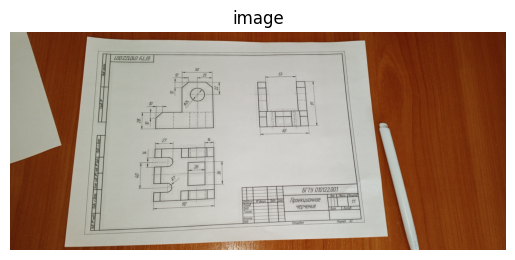

In [70]:
visual(drawing_photo)

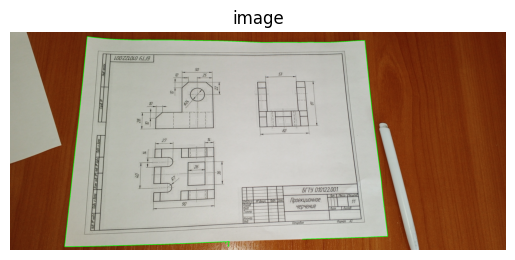

In [77]:
import copy
drawing_photo_contour = copy.deepcopy(drawing_photo)
cv2.drawContours(drawing_photo_contour, head_contours, -1, (0, 255, 0), 3) 
visual(drawing_photo_contour)

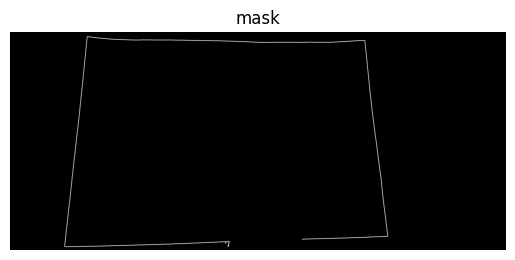

In [78]:
img = drawing_photo_2

contours = contours
idx = id_main_contours 
mask = np.zeros_like(img) 
cv2.drawContours(mask, head_contours, -1, (255, 255, 255), 3) 
visual(mask, 'mask') 


In [73]:
img.shape

(1728, 3936, 3)

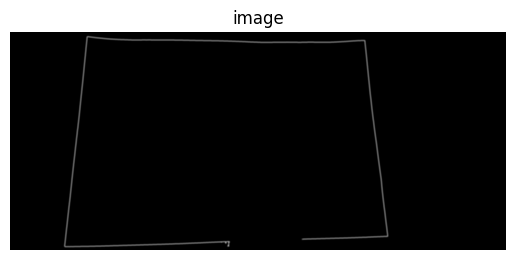

In [83]:
img = copy.deepcopy(mask)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (13,13))  
visual(blur)
corners = cv2.goodFeaturesToTrack(blur, 6, 0.01, 1) #27, 0.01, 10)

for i in corners: 
    x, y = i.ravel() 
    d = (int(x),int(y))
    cv2.circle(img=img, center=d, radius=15, color=(0,255,0), thickness=-1) 

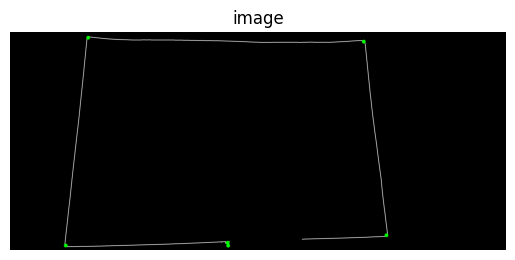

In [84]:
visual(img)

(1728, 3936, 3)